In [1]:
# install.packages("caret")
# install.packages("e1071")
# install.packages("ggplot2")
# install.packages("dplyr")
 install.packages("SHAPforxgboost")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘colourpicker’, ‘shinyjs’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘checkmate’, ‘ggforce’, ‘ggExtra’, ‘ggpubr’, ‘BBmisc’




In [2]:
# install.packages("xgboost")
# install.packages("randomForest")

In [3]:
library("caret")
library("xgboost")
library("SHAPforxgboost")
library("ggplot2")
library("dplyr")
library("randomForest")


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘dplyr’


The following object is masked from ‘package:xgboost’:

    slice


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [4]:

#Read the dataset, here because the csv file is in same folder there is no need of mentioning path otherwise we need to mention path as well
data <- read.csv("/content/GDSC_DATASET.csv", header = TRUE, sep = ",")
head(data)

,COSMIC_ID,CELL_LINE_NAME,TCGA_DESC,DRUG_ID,DRUG_NAME,LN_IC50,AUC,Z_SCORE,GDSC.Tissue.descriptor.1,GDSC.Tissue.descriptor.2,Cancer.Type..matching.TCGA.label.,Microsatellite.instability.Status..MSI.,Screen.Medium,Growth.Properties,CNA,Gene.Expression,Methylation,TARGET,TARGET_PATHWAY
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,683667,PFSK-1,MB,1003,Camptothecin,-1.463887,0.930220,0.433123,nervous_system,medulloblastoma,MB,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
2,684057,ES5,UNCLASSIFIED,1003,Camptothecin,-3.360586,0.791072,-0.599569,bone,ewings_sarcoma,,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
3,684059,ES7,UNCLASSIFIED,1003,Camptothecin,-5.044940,0.592660,-1.516647,bone,ewings_sarcoma,,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
4,684062,EW-11,UNCLASSIFIED,1003,Camptothecin,-3.741991,0.734047,-0.807232,bone,ewings_sarcoma,,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication
5,684072,SK-ES-1,UNCLASSIFIED,1003,Camptothecin,-5.142961,0.582439,-1.570016,bone,ewings_sarcoma,,MSS/MSI-L,R,Semi-Adherent,Y,Y,Y,TOP1,DNA replication
6,687448,COLO-829,SKCM,1003,Camptothecin,-1.235034,0.867348,0.557727,skin,melanoma,SKCM,MSS/MSI-L,R,Adherent,Y,Y,Y,TOP1,DNA replication


# **Exploratory data Analysis**

In [5]:
summary(data)


   COSMIC_ID       CELL_LINE_NAME      TCGA_DESC            DRUG_ID    
 Min.   : 683667   Length:242035      Length:242035      Min.   :1003  
 1st Qu.: 906805   Class :character   Class :character   1st Qu.:1149  
 Median : 909720   Mode  :character   Mode  :character   Median :1631  
 Mean   : 992107                                         Mean   :1594  
 3rd Qu.:1240144                                         3rd Qu.:1912  
 Max.   :1789883                                         Max.   :2499  
  DRUG_NAME            LN_IC50            AUC              Z_SCORE         
 Length:242035      Min.   :-8.748   Min.   :0.006282   Min.   :-8.254501  
 Class :character   1st Qu.: 1.508   1st Qu.:0.849452   1st Qu.:-0.656842  
 Mode  :character   Median : 3.237   Median :0.944197   Median : 0.010585  
                    Mean   : 2.817   Mean   :0.882593   Mean   : 0.000006  
                    3rd Qu.: 4.700   3rd Qu.:0.974934   3rd Qu.: 0.656037  
                    Max.   :13.820   Max

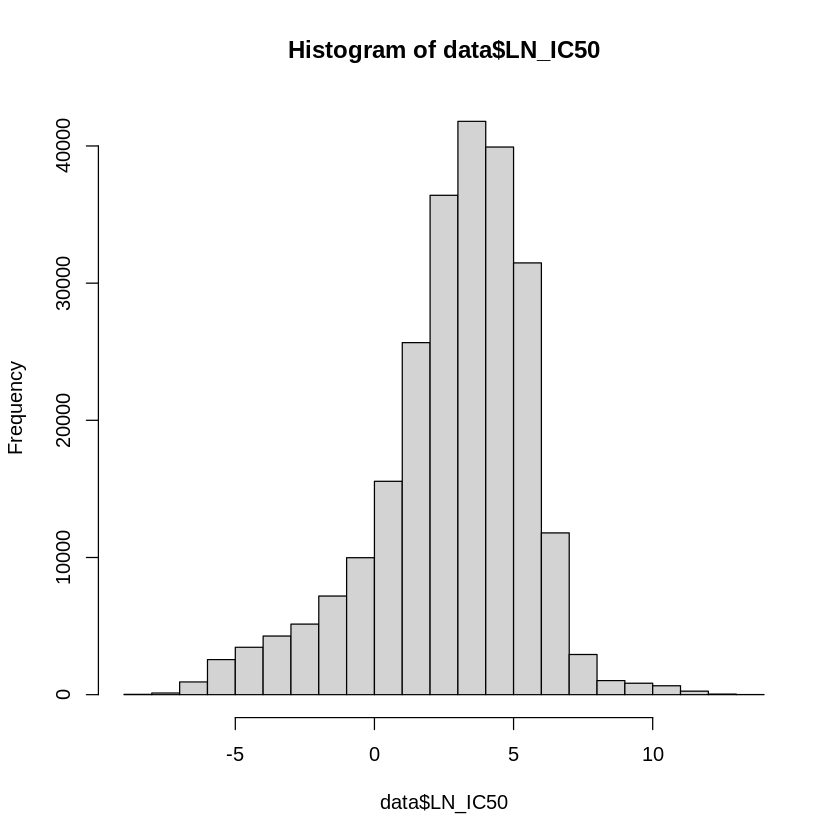

In [6]:
hist(data$LN_IC50)


In [7]:
data <- na.omit(data)  # Remove rows with NA values
summary(data)


   COSMIC_ID       CELL_LINE_NAME      TCGA_DESC            DRUG_ID    
 Min.   : 683667   Length:242035      Length:242035      Min.   :1003  
 1st Qu.: 906805   Class :character   Class :character   1st Qu.:1149  
 Median : 909720   Mode  :character   Mode  :character   Median :1631  
 Mean   : 992107                                         Mean   :1594  
 3rd Qu.:1240144                                         3rd Qu.:1912  
 Max.   :1789883                                         Max.   :2499  
  DRUG_NAME            LN_IC50            AUC              Z_SCORE         
 Length:242035      Min.   :-8.748   Min.   :0.006282   Min.   :-8.254501  
 Class :character   1st Qu.: 1.508   1st Qu.:0.849452   1st Qu.:-0.656842  
 Mode  :character   Median : 3.237   Median :0.944197   Median : 0.010585  
                    Mean   : 2.817   Mean   :0.882593   Mean   : 0.000006  
                    3rd Qu.: 4.700   3rd Qu.:0.974934   3rd Qu.: 0.656037  
                    Max.   :13.820   Max

In [8]:
duplicated_rows <- data[duplicated(data), ]
print(duplicated_rows) #The output is 0, thus we do not have any duplicated rows


 [1] COSMIC_ID                              
 [2] CELL_LINE_NAME                         
 [3] TCGA_DESC                              
 [4] DRUG_ID                                
 [5] DRUG_NAME                              
 [6] LN_IC50                                
 [7] AUC                                    
 [8] Z_SCORE                                
 [9] GDSC.Tissue.descriptor.1               
[10] GDSC.Tissue.descriptor.2               
[11] Cancer.Type..matching.TCGA.label.      
[12] Microsatellite.instability.Status..MSI.
[13] Screen.Medium                          
[14] Growth.Properties                      
[15] CNA                                    
[16] Gene.Expression                        
[17] Methylation                            
[18] TARGET                                 
[19] TARGET_PATHWAY                         
<0 rows> (or 0-length row.names)


In [9]:
shape<-dim(data)
shape

[1] 242035     19

In [10]:
#Correlation score tells how much one variable is related to other variable
cor(data$Z_SCORE, data$LN_IC50)

[1] 0.5092093

# **Data Preprocessing**

In [11]:
preProcess_missingdata <- preProcess(data, method = 'medianImpute')
data_imputed <- predict(preProcess_missingdata, newdata = data)

In [12]:
# Separate features (X) and target (y)
X <- data_imputed[, !names(data_imputed) %in% c("LN_IC50")]
y <- data_imputed$LN_IC50

In [13]:
# Normalize the features
preProcess_normalize <- preProcess(X, method = c("center", "scale"))
X_normalized <- predict(preProcess_normalize, X)


In [14]:
# Split the data into training and test sets
set.seed(42)
trainIndex <- createDataPartition(y, p = .8, list = FALSE, times = 1)
X_train <- X_normalized[trainIndex,]
X_test <- X_normalized[-trainIndex,]
y_train <- y[trainIndex]
y_test <- y[-trainIndex]


# **PCA**

In [15]:
# Apply PCA for dimensionality reduction (optional)
pca_model <- preProcess(X_train, method = "pca", thresh = 0.95)
X_train_pca <- predict(pca_model, X_train)
X_test_pca <- predict(pca_model, X_test)

# **Model Development with Random Forest**

In [ ]:
# Train a Random Forest model
rf_model <- randomForest(X_train_pca, y_train, ntree = 100, importance = TRUE)


In [ ]:
# Evaluate the model using cross-validation
set.seed(42)
train_control <- trainControl(method = "cv", number = 8)
rf_cv <- train(X_train_pca, y_train, method = "rf", trControl = train_control, ntree = 100)


In [ ]:
# Predict on the test set
y_pred <- predict(rf_model, X_test_pca)


**RMSE**: Lower values indicate a better fit, with 0 being a perfect fit.

**MAE**: Like RMSE, lower values indicate a better fit, and 0 indicates perfect predictions.

**R-squared (R²):** Values closer to 1 indicate that the model explains a large portion of the variance in the data. Values close to 0 suggest the model does not explain much of the variance.

In [ ]:
mse <- mean((y_pred - y_test)^2)
r_squared <- 1 - (sum((y_test - y_pred)^2) / sum((y_test - mean(y_test))^2))

print(paste("MSE:", mse))
print(paste("R-squared:", r_squared))

# **XGBoost**

In [ ]:
dtrain <- xgb.DMatrix(data = X_train, label = y_train)

# Set parameters for xgboost
params <- list(
  objective = "reg:squarederror",
  eval_metric = "rmse",
  max_depth = 6,
  eta = 0.1
)

# Train the model
xgb_model <- xgb.train(params, dtrain, nrounds = 100)

Once the model is trained, you can calculate SHAP values using the SHAPforxgboost package.

In [ ]:
# Calculate SHAP values for your training data
shap_values <- shap.values(xgb_model, X_train)

# Extract the SHAP values and the corresponding feature names
shap_scores <- shap_values$shap_score
colnames(shap_scores) <- colnames(X_train)

we can visualize the SHAP values to interpret our model.

In [ ]:
shap.plot.summary(shap_scores, X_train)

This plot shows the distribution of SHAP values for each feature across all instances in our dataset. It helps us understand the impact of each feature on the predictions.

**Positive SHAP Values:** Features with positive SHAP values push the prediction higher, meaning they are associated with higher LN_IC50 values.

**Negative SHAP Values:** Features with negative SHAP values push the prediction lower, meaning they are associated with lower LN_IC50 values.